In [4]:
#price data of Twitter from 2013 to 2022
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv("C:\\Users\\Amshik\\Desktop\\2nd sem projects\\python project\\TWTR.csv")
df.head()
#Date: Date of the record
#Open: Opening price
#High: Highest price recorded
#Low: Lowest price recorded
#Close: Closing price
#Adj Close: Adjusted Closing price
#Volume: The total number of shares traded per day

,Date,Open,High,Low,Close,Adj Close,Volume,Time
0,07-11-2013,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,1
1,08-11-2013,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,2
2,11-11-2013,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,3
3,12-11-2013,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,4
4,13-11-2013,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,5


In [5]:
df.isna().sum()
df = df.dropna()
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Time         0
dtype: int64

In [6]:
df.info() #summary of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259 entries, 0 to 2258
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
 7   Time       2259 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 158.8+ KB


In [7]:
#total null values in dataframe

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Time'], dtype='object')

In [9]:
print(df['Adj Close'].isna().sum())

0


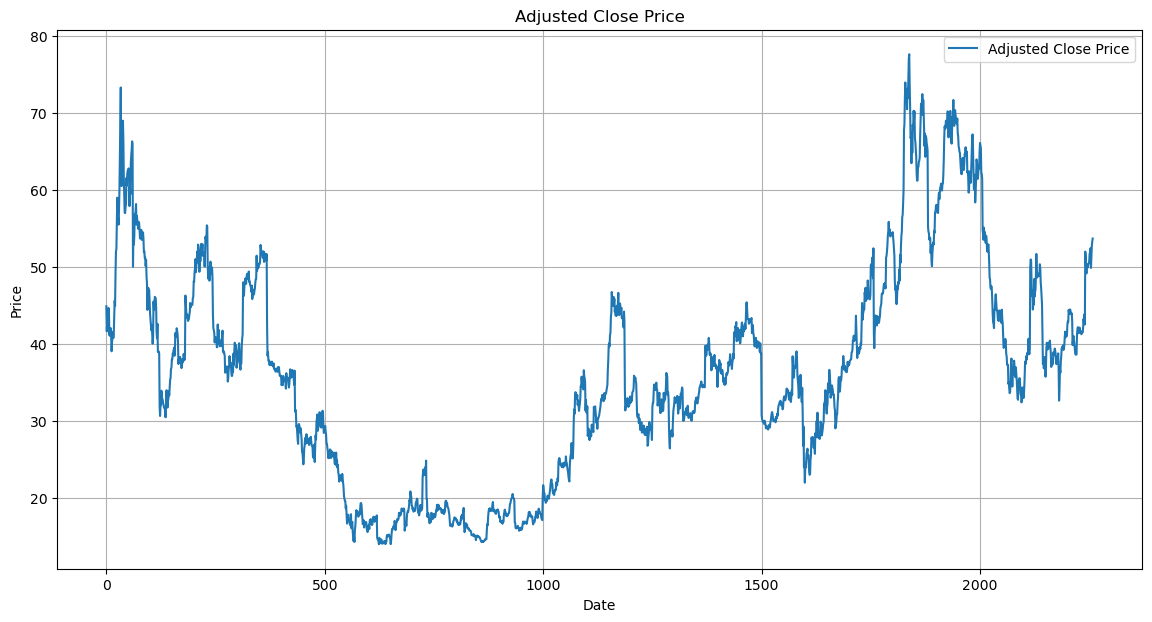

In [10]:
plt.figure(figsize=(14, 7))#line plot
plt.plot(df['Adj Close'], label='Adjusted Close Price')
plt.title('Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

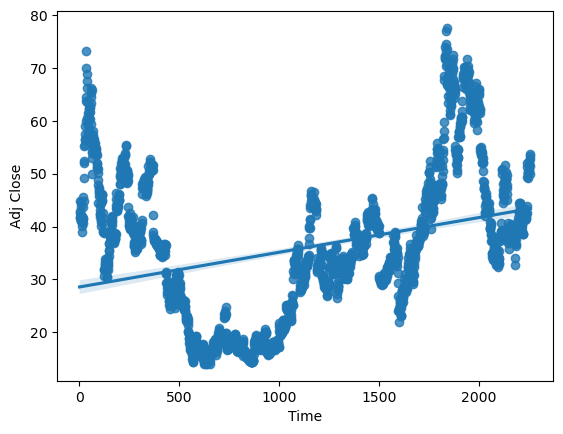

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is  DataFrame and it contains 'Time' and 'Adj Close' columns
#scatter plot of the "Adj Close" prices against "Time," along with a fitted regression line that shows the trend in the data over time.
#This is useful for visualizing relationships between the two variables and understanding how "Adj Close" changes with "Time."
sns.regplot(x="Time", y="Adj Close", data=df)
plt.show()


Checking for missing or infinite values:
Time         0
Adj Close    0
dtype: int64
Time         0
Adj Close    0
dtype: int64
R-squared: 0.0925


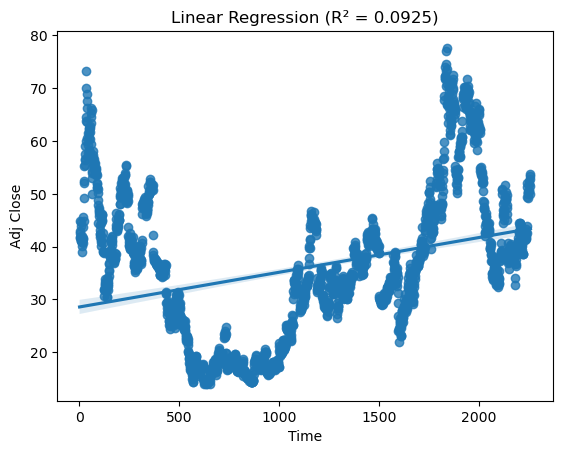

In [12]:
# Import necessary libraries
import numpy as np  # For handling NaN and infinity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'Time' and 'Adj Close' columns

# Check for NaN and infinity in the data
print("Checking for missing or infinite values:")
print(df[['Time', 'Adj Close']].isnull().sum())  # Check for NaN
print(df[['Time', 'Adj Close']].applymap(np.isinf).sum())  # Check for inf/-inf

# 1. Remove rows with NaN or infinite values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Time', 'Adj Close'])

# Alternatively, you can fill NaN values with a default value like mean or median:
# df_clean = df.fillna(df.mean())

# 2. Proceed with linear regression after cleaning

# Reshaping 'Time' to be 2D as sklearn requires 2D arrays for features
X = df_clean['Time'].values.reshape(-1, 1)
y = df_clean['Adj Close'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Output the R-squared value
print(f"R-squared: {r_squared:.4f}")

# Plotting the regression as before
sns.regplot(x="Time", y="Adj Close", data=df_clean)
plt.title(f'Linear Regression (R² = {r_squared:.4f})')
plt.show()


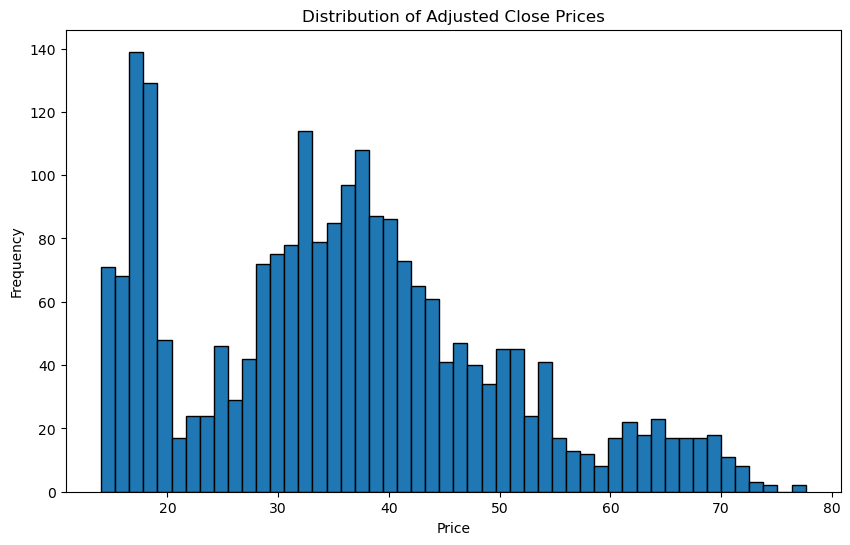

In [14]:
# Plot distribution of 'Adj Close' prices
plt.figure(figsize=(10, 6))
plt.hist(df['Adj Close'], bins=50, edgecolor='k')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


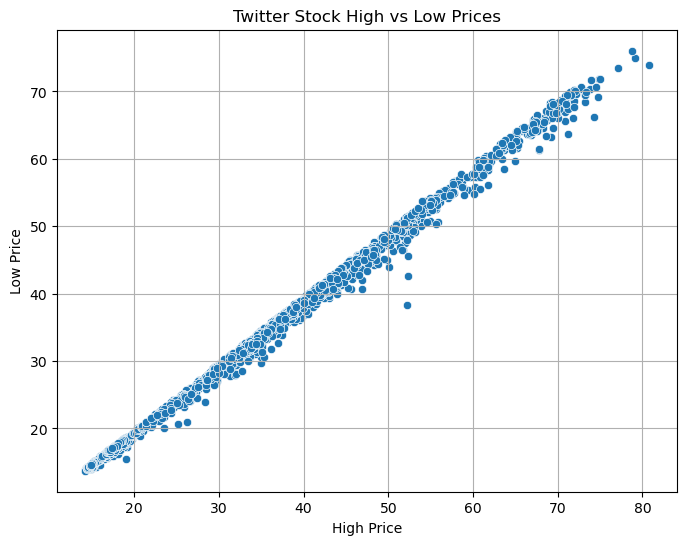

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot High vs Low Prices using seaborn and matplotlib
# each pont represents specific date or time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Low', data=df)
plt.title('Twitter Stock High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


In [37]:
df_clean = df.drop_duplicates()

In [38]:
print(df.dtypes)

Date                 object
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Time         datetime64[ns]
dtype: object


In [39]:
df['Time'] = pd.to_datetime(df['Time'])  # Example for date conversion

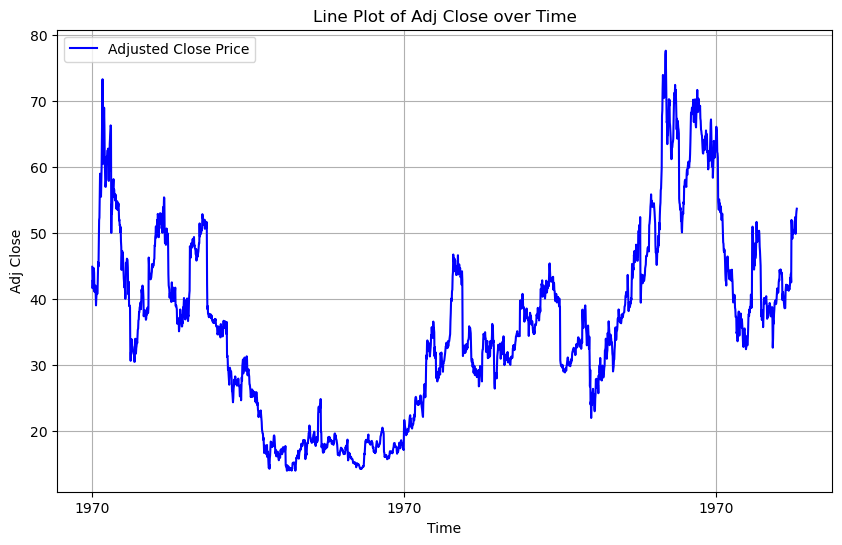

In [40]:
import matplotlib.pyplot as plt

# Line plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Line Plot of Adj Close over Time')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


         Date       Open       High        Low      Close  Adj Close  \
0  07-11-2013  45.099998  50.090000  44.000000  44.900002  44.900002   
1  08-11-2013  45.930000  46.939999  40.685001  41.650002  41.650002   
2  11-11-2013  40.500000  43.000000  39.400002  42.900002  42.900002   
3  12-11-2013  43.660000  43.779999  41.830002  41.900002  41.900002   
4  13-11-2013  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  Time  
0  117701670.0     1  
1   27925307.0     2  
2   16113941.0     3  
3    6316755.0     4  
4    8688325.0     5  
            Date  Open  High  Low  Close  Adj Close  Volume  Time
2259  28-10-2022   NaN   NaN  NaN    NaN        NaN     NaN  2260
2260  31-10-2022   NaN   NaN  NaN    NaN        NaN     NaN  2261
2261  01-11-2022   NaN   NaN  NaN    NaN        NaN     NaN  2262
2262  02-11-2022   NaN   NaN  NaN    NaN        NaN     NaN  2263
2263  03-11-2022   NaN   NaN  NaN    NaN        NaN     NaN  2264
Date         0
Open         5
Hig

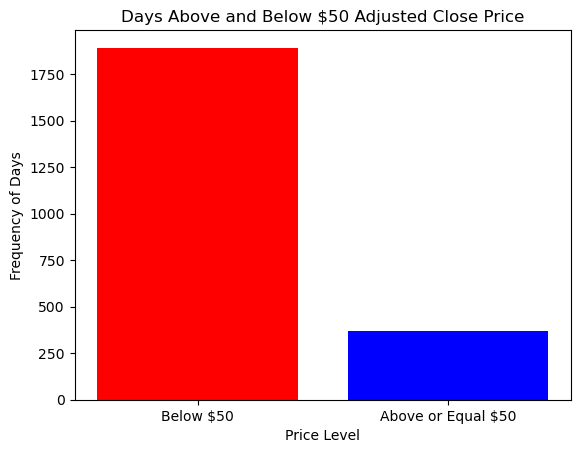

In [41]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
dataset = pd.read_csv("C:\\Users\\Amshik\\Desktop\\2nd sem projects\\python project\\TWTR.csv")

# Display the first and last few rows of the dataset
print(dataset.head())
print(dataset.tail())

# Check for missing values
print(dataset.isna().sum())
#The plot gives a quick summary of how often the stock's Adjusted Close price was below or above $50 during the observed period.

# Define a price threshold (you can adjust this value as needed)
threshold = 50  # Example threshold for 'Adj Close'

# Calculate the counts for days when Adj Close was above and below the threshold
counts = []
counts.append((dataset['Adj Close'] < threshold).sum())  # Days when 'Adj Close' is below threshold
counts.append((dataset['Adj Close'] >= threshold).sum())  # Days when 'Adj Close' is above or equal to threshold

# Labels for the bar plot
labels = ['Below $50', 'Above or Equal $50']

# Create the bar plot
plt.bar(labels, counts, color=['red', 'blue'])
plt.title('Days Above and Below $50 Adjusted Close Price')
plt.xlabel('Price Level')
plt.ylabel('Frequency of Days')
plt.show()


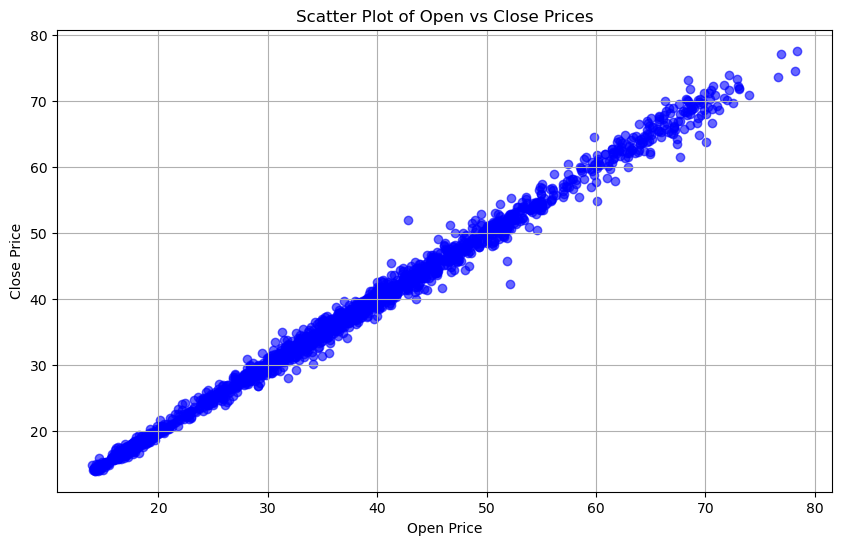

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("C:\\Users\\Amshik\\Desktop\\2nd sem projects\\python project\\TWTR.csv")

# Scatter plot of Open vs Close prices
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Open'], dataset['Close'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


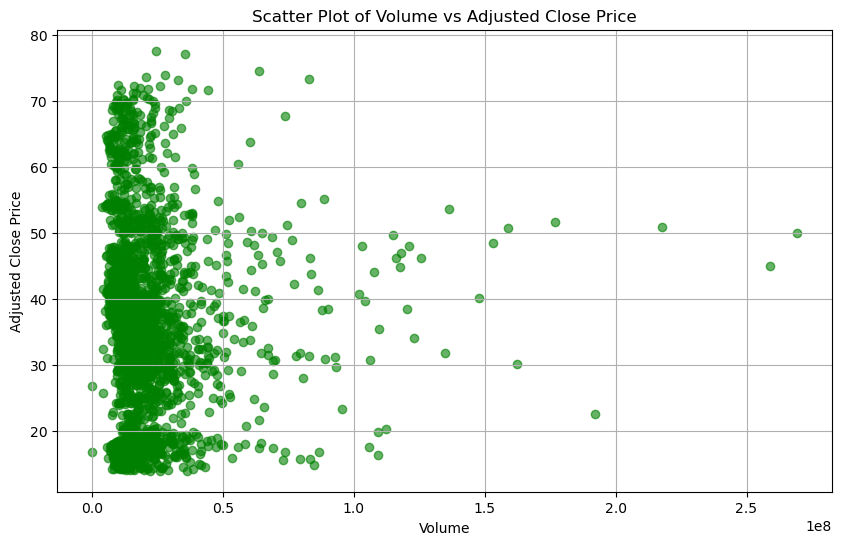

In [43]:
# Scatter plot of Volume vs Adjusted Close prices
#Clusters of points could indicate periods of high activity, while sparse areas might suggest lower trading volumes.
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Volume'], dataset['Adj Close'], color='green', alpha=0.6)
plt.title('Scatter Plot of Volume vs Adjusted Close Price')
plt.xlabel('Volume')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


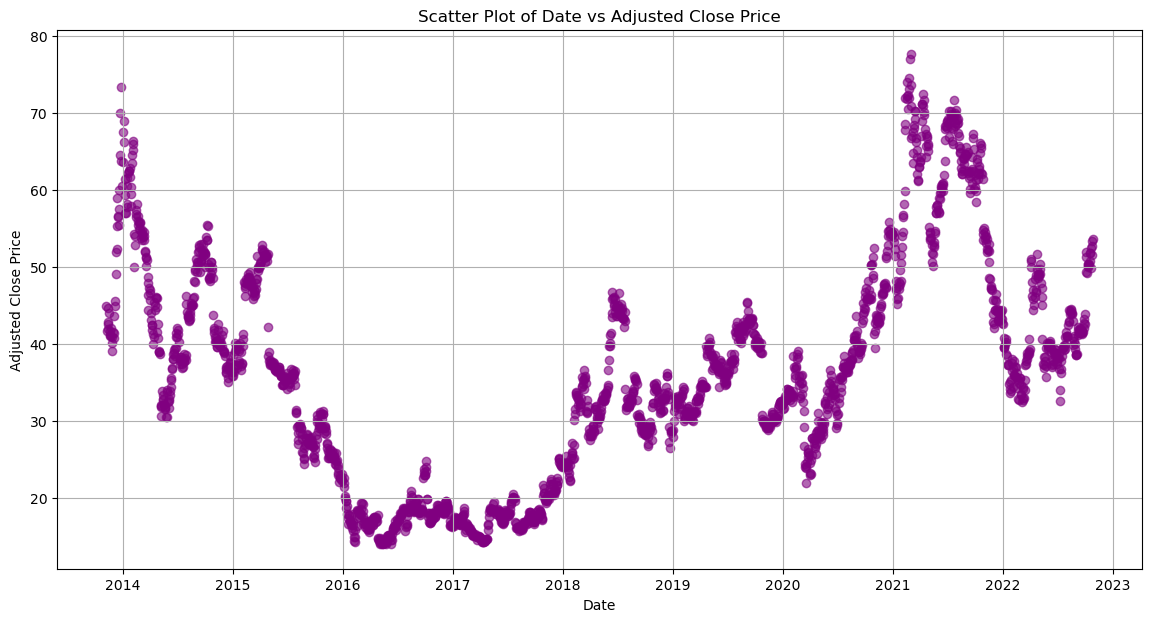

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format with the correct format string
#a downward trend would suggest a decrease in price.
#Clusters of points in specific periods may indicate days with significant trading activity or events affecting stock prices.
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')  # Correcting format to match the data

# Scatter plot of Date vs Adjusted Close prices
plt.figure(figsize=(14, 7))
plt.scatter(dataset['Date'], dataset['Adj Close'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Date vs Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


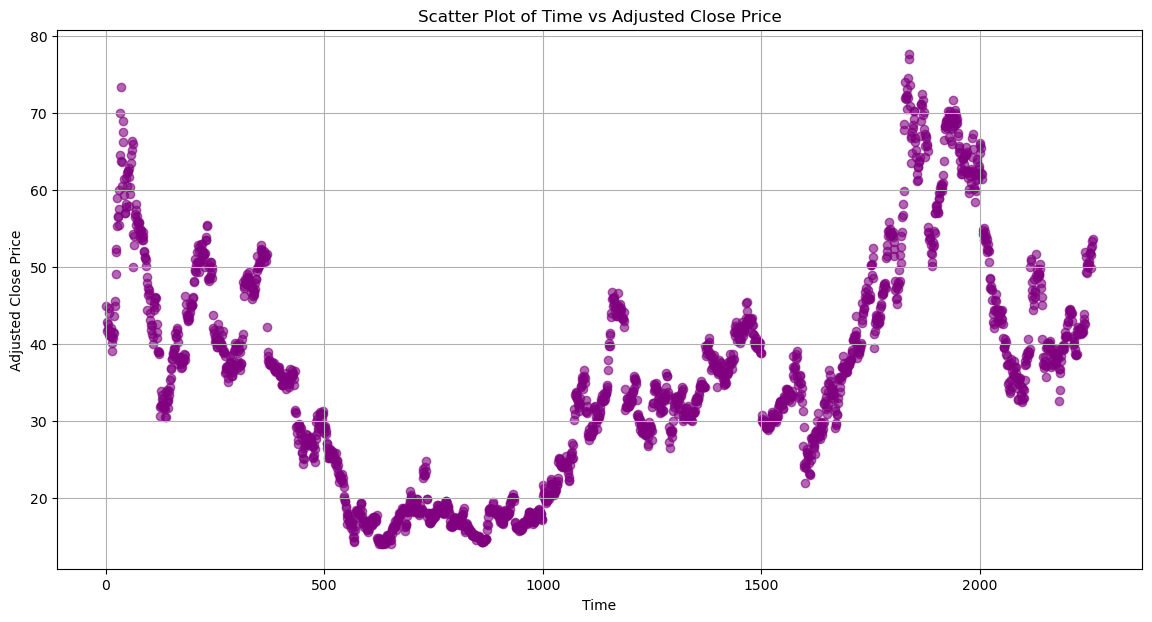

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'Time' is not in datetime format, you may need to convert it
# dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M')  # Uncomment if needed, based on the time format

# Scatter plot of Time vs Adjusted Close prices
plt.figure(figsize=(14, 7))
plt.scatter(dataset['Time'], dataset['Adj Close'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Time vs Adjusted Close Price')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.grid(True)  # Fixed typo here
plt.show()


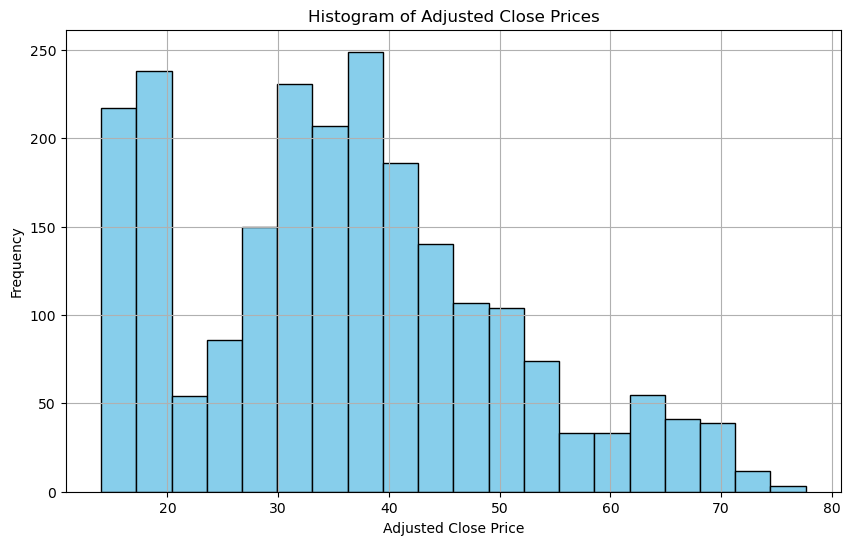

In [46]:
import pandas as pd#distribution of values in columns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("C:\\Users\\Amshik\\Desktop\\2nd sem projects\\python project\\TWTR.csv")

# Create a histogram for the 'Adj Close' column
plt.figure(figsize=(10, 6))
plt.hist(dataset['Adj Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [47]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Time'], dtype='object')

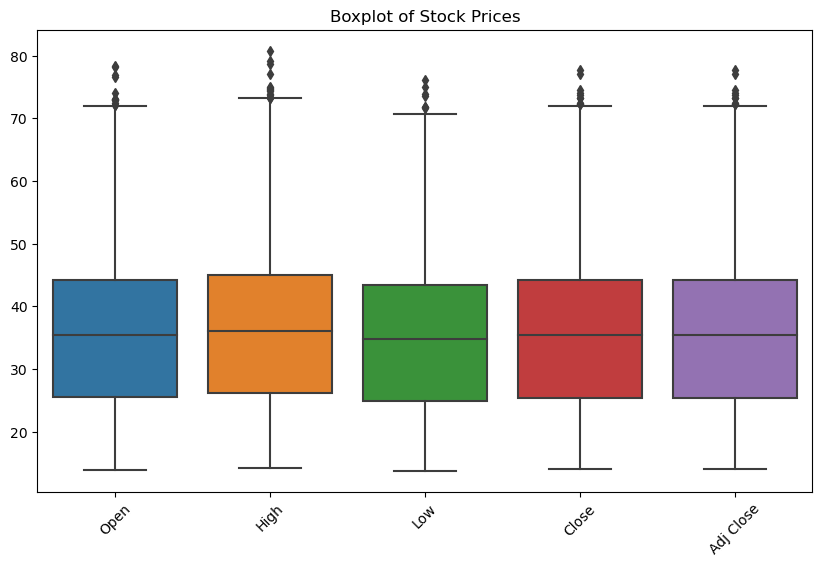

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1st Boxplot for stock prices
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[price_columns])
plt.title('Boxplot of Stock Prices')
plt.xticks(rotation=45)
plt.show()

